Imports


In [1]:
import tensorflow
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploração dos dados

In [ ]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_treino)
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()


Exibir os dados

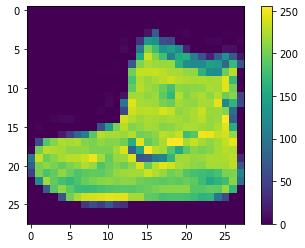

In [3]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [ ]:
# modelo #vai ser em sequência
#   entrada
#   processamento
#   saida

In [4]:
# processo de dividir a imagem pela colarização é chamado de normalização, eficiente para diminuir a perca em alguns casos
imagens_treino = imagens_treino/float(255)

Criando, copilando e treinando o modelo e normalizando o modelo com Dropout

In [13]:
#criando o modelo
modelo = keras.Sequential([
  keras.layers.Flatten(input_shape = (28, 28)),
  keras.layers.Dense(256, activation = tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation= tensorflow.nn.softmax)
])


adam = keras.optimizers.Adam(lr = 0.002)


parando_cedo = [keras.callbacks.EarlyStopping(monitor = 'val_loss'),
                keras.callbacks.ModelCheckpoint(filepath = 'melhor_modelo.hdf5',
                                                monitor = 'val_loss', 
                                                save_best_only = True)
               ]


#copilando o modelo
modelo.compile(optimizer = adam,
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])

#salvando dados do modelo e treinando o modelo
historico = modelo.fit(imagens_treino, identificacoes_treino,
                        batch_size = 480,
                        epochs = 5, validation_split = 0.2,
                        callbacks = parando_cedo)

Epoch 1/5
100/100 [==============================] - 0s 4ms/step - loss: 0.6623 - accuracy: 0.7697 - val_loss: 0.4665 - val_accuracy: 0.8346
Epoch 2/5
100/100 [==============================] - 0s 3ms/step - loss: 0.4423 - accuracy: 0.8446 - val_loss: 0.4082 - val_accuracy: 0.8551
Epoch 3/5
100/100 [==============================] - 0s 3ms/step - loss: 0.3911 - accuracy: 0.8616 - val_loss: 0.3838 - val_accuracy: 0.8662
Epoch 4/5
100/100 [==============================] - 0s 3ms/step - loss: 0.3670 - accuracy: 0.8673 - val_loss: 0.3592 - val_accuracy: 0.8717
Epoch 5/5
100/100 [==============================] - 0s 3ms/step - loss: 0.3440 - accuracy: 0.8755 - val_loss: 0.3518 - val_accuracy: 0.8745


## sumario do modelo

In [ ]:
# resumo do modelo
sumario_do_modelo = modelo.summary()

## visualizando as configurações do modelo

In [ ]:
modelo.get_config()

## Visualizando os pesos da camada dense 1

In [ ]:
#pesos do tensor na camada 1
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

## visualizando os vieses da camada 1

In [ ]:
#vieses do tensor na camada 1
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

## Mudando os pesos e viéses do modelo

resumo: configurar os pesos = 0 mata a rede/ configurar os pesos = aleatório deixa a rede viciada
                                              # configurar os vieses = 0 pouca influencia / configurar os vieses = aleatório mata a rede
   

In [ ]:
# pesos_camada_dense.shape
# pesos_camada_dense_zerados = np.zeros((784, 256))

# vieses_camada_dense_zerados = np.zeros((256,))

# modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_zerados])

# pesos_camada_dense_aleatorios = np.random.rand(784, 256)


#  modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])

# modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])


# modelo.layers[1].get_weights()


 Como salvar o modelo e carregar o modelo treinado

In [ ]:
from tensorflow.keras.models import load_model

modelo.save('modelo.hdf5')
modelo_salvo = load_model('modelo.hdf5')

Visualizando as acurácias de treino e validação por época

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

Visualizando as perdas de treino e validação por época

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [ ]:
testes = modelo.predict(imagens_teste)
print('O resultadodo teste é: ', np.argmax(testes[1]))
print('número da imagem de teste: ', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('O resultado do teste do modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste do modelo salvo: ', identificacoes_teste[1])

Avaliando o modelo

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste,
      'Acurácia do teste: ', acuracia_teste
      )